<a href="https://colab.research.google.com/github/EmilGligore/KMeans-and-Optimization-with-Elbow-Technique/blob/main/KMeans_and_Optimization_with_Elbow_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [ ]:
data = load_wine()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df['target'] = data['target'] # poate nu e nevoie sa adaugi target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#Elbow (WCSS)

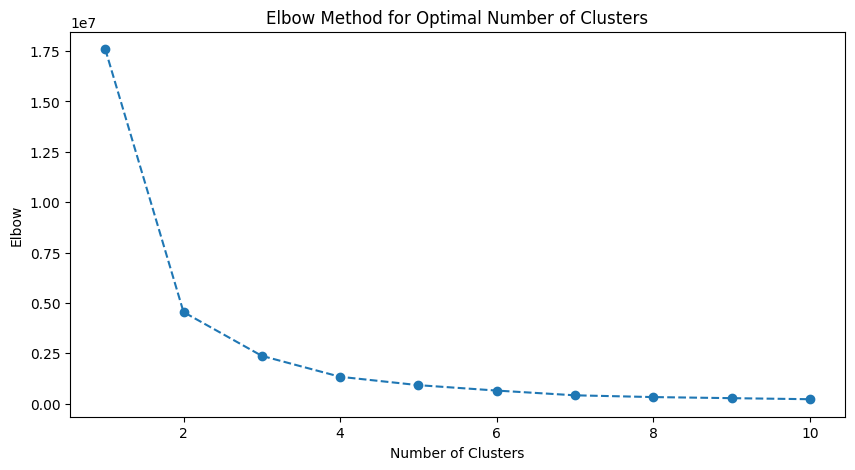

In [ ]:
#WCSS = within cluster sum of squares
elbow = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  n_init=10, random_state=0)
  kmeans.fit(df)
  elbow.append(kmeans.inertia_)

_ = plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), elbow, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow')
plt.show()

#KMeans Fit

##Fitting

In [ ]:
#We fit KMeans
kmeans_optimal = KMeans(n_clusters=2, n_init=10, random_state=0, init='k-means++').fit(df)

In [ ]:
#We put the output in a column in the frame
df['cluster'] = kmeans_optimal.fit_predict(df)

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0


##Plotting

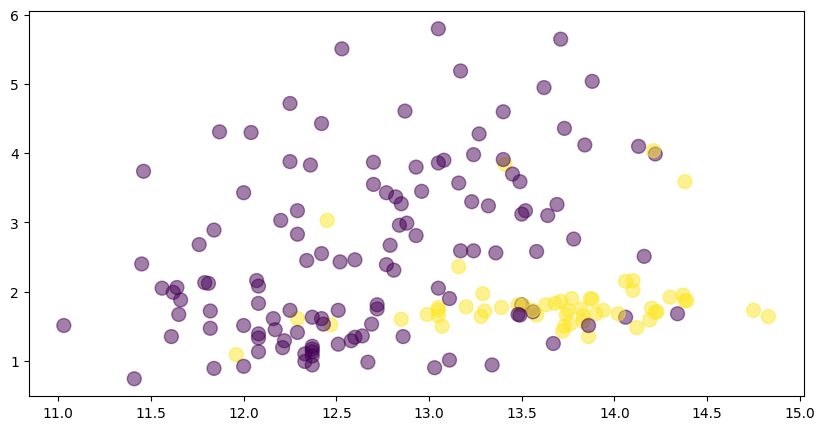

In [ ]:
_ = plt.figure(figsize=(10, 5))
plt.scatter(df['alcohol'], df['malic_acid'], s=100, alpha=0.5, c=df['cluster'], label='KMeans')
plt.show()

##Plotting with Centroids

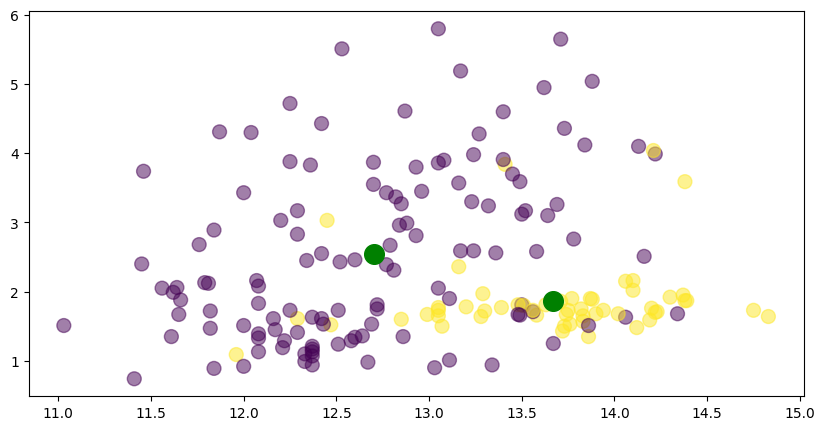

In [ ]:
_ = plt.figure(figsize=(10, 5))
plt.scatter(df['alcohol'], df['malic_acid'], s=100, alpha=0.5, c=df['cluster'], label='KMeans') # poate sa fie si c = kmeans_optimal.labels_
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200)
plt.show()

#Cluster Characteristics (The mean of the columns by clusters)

In [ ]:
cluster_characteristics = df.groupby('cluster')
cluster_characteristics.mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,12.702846,2.544553,2.339106,20.408130,96.813008,2.062114,1.641463,0.392683,1.454065,4.851382,0.908618,2.408211,565.869919
1,13.666545,1.870727,2.427818,17.452727,106.290909,2.816182,2.896545,0.292909,1.896909,5.520364,1.066655,3.066727,1151.727273


In [ ]:
df['cluster'].value_counts() #Cate puncte ai  in fiecare cluster

0    123
1     55
Name: cluster, dtype: int64

#Feature Importance

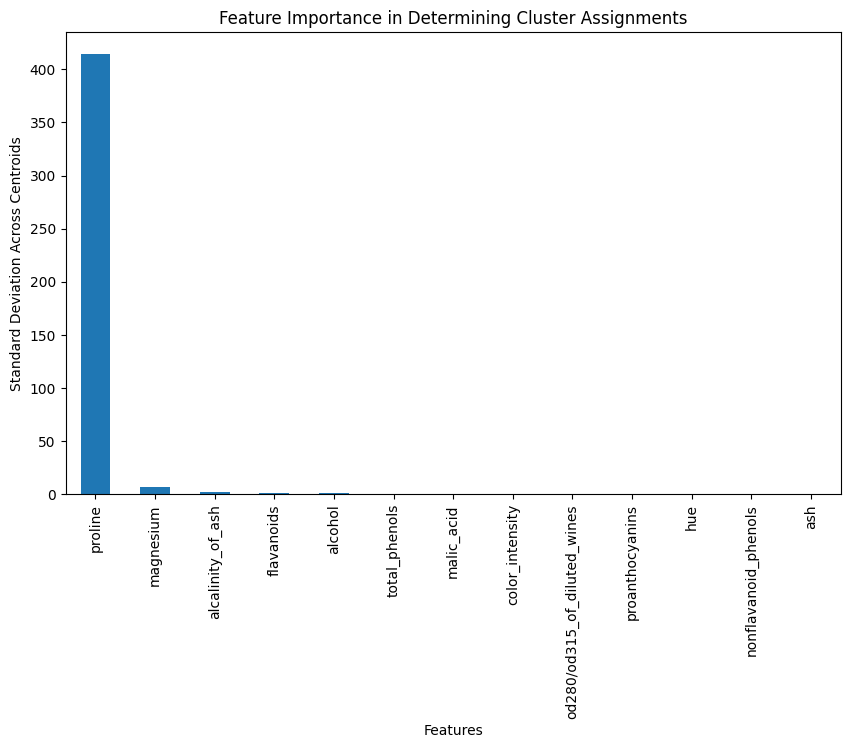

'\nHigh Variance Features: Features with higher standard deviation or range values are considered more important in determining the cluster assignments. These features have the greatest variation across different clusters, indicating that they play a significant role in differentiating between clusters.\n\nLow Variance Features: Conversely, features with lower variance contribute less to the distinction between clusters.\n'

In [ ]:
centroids_df = pd.DataFrame(centers, columns=data['feature_names'])

feature_importance = centroids_df.std()

sorted_features = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar')
plt.title('Feature Importance in Determining Cluster Assignments')
plt.xlabel('Features')
plt.ylabel('Standard Deviation Across Centroids')
plt.show()
"""
High Variance Features: Features with higher standard deviation or range values are considered more important in determining the cluster assignments. These features have the greatest variation across different clusters, indicating that they play a significant role in differentiating between clusters.

Low Variance Features: Conversely, features with lower variance contribute less to the distinction between clusters.
"""

#Train Test Split and Scale

In [ ]:
X, y = data.data, data.target

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled, X_test_scaled)

[[ 0.62844732  1.08120605 -0.65212742 ... -0.64137827 -1.07090115
  -0.51821917]
 [-0.54088231 -0.61299439 -1.42753372 ...  0.34652993  1.33076844
  -0.21506322]
 [-0.75565714 -1.28703113 -1.53830605 ...  0.43243499 -0.39843366
   0.04196031]
 ...
 [ 1.69038953 -0.48547393  0.04943066 ...  1.03377042  0.54851034
   2.66821356]
 [-0.32610748 -0.79516648 -0.39365865 ...  0.00290969 -0.74152932
  -0.79830892]
 [-0.74372521  0.04282513  0.34482354 ... -0.6843308   1.07001574
  -0.98613381]] [[ 8.07426344e-01  6.34884427e-01  7.14064633e-01 -1.23917300e+00
   9.87957814e-01  6.55322163e-01  1.01578048e+00 -1.54004746e+00
   1.15684915e-01  5.78114131e-02  2.90968755e-03  1.04256809e+00
   3.55001792e-01]
 [ 1.48754664e+00  1.49109325e+00  2.70975320e-01 -1.72907860e-01
   6.61273097e-01  8.85694346e-01  6.38337246e-01 -5.09085455e-01
  -5.92067322e-01  1.22062766e-01 -3.83663087e-01  1.00139661e+00
   1.12936755e+00]
 [-3.97410416e-02  3.70734895e-01  1.23100217e+00  4.32269651e-01
  -3.187